In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 
 
sns.set_style("whitegrid")

import plotly.express as px

import missingno as msno

In [2]:
# mount Google Drive

from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [3]:
food_security = pd.read_csv('/content/MyDrive/MyDrive/FAOSTAT_data.csv')

In [4]:
disasters = pd.read_csv('/content/MyDrive/MyDrive/emdat.csv', encoding = 'latin-1')

# Food Security data

In [5]:
food_security.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46382 entries, 0 to 46381
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       46382 non-null  object
 1   Domain            46382 non-null  object
 2   Area Code (M49)   46382 non-null  int64 
 3   Area              46382 non-null  object
 4   Element Code      46382 non-null  int64 
 5   Element           46382 non-null  object
 6   Item Code         46382 non-null  object
 7   Item              46382 non-null  object
 8   Year Code         46382 non-null  int64 
 9   Year              46382 non-null  object
 10  Unit              46382 non-null  object
 11  Value             35201 non-null  object
 12  Flag              46382 non-null  object
 13  Flag Description  46382 non-null  object
 14  Note              813 non-null    object
dtypes: int64(3), object(12)
memory usage: 5.3+ MB


In [6]:
food_security.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (const...",2012,2012,I$,2075.5,X,Figure from international organizations,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (const...",2013,2013,I$,2116.5,X,Figure from international organizations,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (const...",2014,2014,I$,2102.4,X,Figure from international organizations,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (const...",2015,2015,I$,2068.3,X,Figure from international organizations,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6126,Value,22013,"Gross domestic product per capita, PPP, (const...",2016,2016,I$,2057.1,X,Figure from international organizations,NaN


In [7]:
food_security.dtypes

Domain Code         object
Domain              object
Area Code (M49)      int64
Area                object
Element Code         int64
Element             object
Item Code           object
Item                object
Year Code            int64
Year                object
Unit                object
Value               object
Flag                object
Flag Description    object
Note                object
dtype: object

In [8]:
food_security['Item'].unique()

array(['Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Prevalence of undernourishment (percent) ',
       'Number of people undernourished (million) ',
       'Prevalence of moderate or severe food insecurity in the total population (percent) ',
       'Prevalence of moderate or severe food insecurity in the male adult population (percent) ',
       'Prevalence of moderate or severe food insecurity in the female adult population (percent) ',
       'Number of severely food insecure people (million) ',
       'Number of severely food insecure male adults (million) ',
       'Number of severely food insecure female adults (million) ',
       'Number of moderately or severely food insecure people (million) ',
       'Number of moderately or severely food insecure male adults (million) ',
       'Number of moderately or severely food insecure female adults (million) ',
       'Cereal import dependency ratio (percent) ',
       'Percent of arable land equi

##### **Gross domestic product per capita, PPP, (constant 2017 international $)**

In [9]:
data = food_security[['Area', 'Year', 'Value']].loc[(food_security['Item'] == 'Gross domestic product per capita, PPP, (constant 2017 international $)' )]

In [10]:
data.rename(columns = {'Value': 'GDP'}, inplace = True)
data = data.reset_index(drop = True)
data = data.astype({'Year': int})

In [11]:
data.head(10)

,Area,Year,GDP
0,Afghanistan,2012,2075.5
1,Afghanistan,2013,2116.5
2,Afghanistan,2014,2102.4
3,Afghanistan,2015,2068.3
4,Afghanistan,2016,2057.1
5,Afghanistan,2017,2058.4
6,Afghanistan,2018,2033.8
7,Afghanistan,2019,2065
8,Afghanistan,2020,1970.6
9,Albania,2000,5892.6


##### **Prevalence of undernourishment (percent)**

In [12]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Prevalence of undernourishment (percent) ' )]

In [13]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'undernourish%'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [14]:
temp.head()

,Area,undernourish%,Year
0,Afghanistan,47.8,2001
1,Afghanistan,45.6,2002
2,Afghanistan,40.6,2003
3,Afghanistan,38,2004
4,Afghanistan,36.1,2005


In [15]:
data = pd.merge(data, temp, on = ['Area', 'Year'])

In [16]:
data.head()

,Area,Year,GDP,undernourish%
0,Afghanistan,2012,2075.5,21.1
1,Afghanistan,2013,2116.5,20.7
2,Afghanistan,2014,2102.4,20.7
3,Afghanistan,2015,2068.3,21.5
4,Afghanistan,2016,2057.1,22.2


##### **Number of people undernourished (million)**

In [17]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Number of people undernourished (million) ' )]

In [18]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'undernourish(in m)'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [19]:
temp.head()

,Area,undernourish(in m),Year
0,Afghanistan,10.3,2001
1,Afghanistan,10.3,2002
2,Afghanistan,9.6,2003
3,Afghanistan,9.4,2004
4,Afghanistan,9.2,2005


In [20]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m)
0,Afghanistan,2012,2075.5,21.1,6.6
1,Afghanistan,2013,2116.5,20.7,6.7
2,Afghanistan,2014,2102.4,20.7,6.9
3,Afghanistan,2015,2068.3,21.5,7.4
4,Afghanistan,2016,2057.1,22.2,7.8


##### **Prevalence of moderate or severe food insecurity in the total population (percent)**

In [21]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Prevalence of moderate or severe food insecurity in the total population (percent) ' )]

In [22]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'm/s_fins%'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [23]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%
0,Afghanistan,2015,2068.3,21.5,7.4,45.1
1,Afghanistan,2016,2057.1,22.2,7.8,49.6
2,Afghanistan,2017,2058.4,23,8.3,54.3
3,Afghanistan,2018,2033.8,24,8.9,57.5
4,Afghanistan,2019,2065,26.9,10.2,63.1


##### **Number of severely food insecure people (million)**

In [24]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Number of severely food insecure people (million) ' )]

In [25]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 's_fins(in m)'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [26]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m)
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1
1,Afghanistan,2016,2057.1,22.2,7.8,49.6,5.3
2,Afghanistan,2017,2058.4,23,8.3,54.3,6.3
3,Afghanistan,2018,2033.8,24,8.9,57.5,6.4
4,Afghanistan,2019,2065,26.9,10.2,63.1,7.5


##### **Number of moderately or severely food insecure people (million)**

In [27]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Number of moderately or severely food insecure people (million) ' )]

In [28]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'm/s_fins(in m)'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [29]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m)
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5
1,Afghanistan,2016,2057.1,22.2,7.8,49.6,5.3,17.6
2,Afghanistan,2017,2058.4,23,8.3,54.3,6.3,19.7
3,Afghanistan,2018,2033.8,24,8.9,57.5,6.4,21.4
4,Afghanistan,2019,2065,26.9,10.2,63.1,7.5,24


##### **Cereal import dependency ratio (percent)**

In [30]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Cereal import dependency ratio (percent) ' )]

In [31]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'c_dep_ratio%'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [32]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27
1,Afghanistan,2016,2057.1,22.2,7.8,49.6,5.3,17.6,34.2
2,Afghanistan,2017,2058.4,23,8.3,54.3,6.3,19.7,41.3
3,Afghanistan,2018,2033.8,24,8.9,57.5,6.4,21.4,41.4
4,Afghanistan,2019,2065,26.9,10.2,63.1,7.5,24,NaN


##### **Percent of arable land equipped for irrigation (percent)**

In [33]:
temp = food_security[['Area', 'Year Code', 'Value']].loc[(food_security['Item'] == 'Percent of arable land equipped for irrigation (percent) ' )]

In [34]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'arable_land%'}, inplace = True)
temp = temp.astype({'Year Code': 'string'})
temp['Year'] = temp['Year Code'].str[0:4] 
temp = temp.astype({'Year': int})
temp.drop(['Year Code'], axis = 1, inplace = True)
temp['Year'] = temp['Year']+1

In [35]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%,arable_land%
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4
1,Afghanistan,2016,2057.1,22.2,7.8,49.6,5.3,17.6,34.2,41.5
2,Afghanistan,2017,2058.4,23,8.3,54.3,6.3,19.7,41.3,41.4
3,Afghanistan,2018,2033.8,24,8.9,57.5,6.4,21.4,41.4,41.3
4,Afghanistan,2019,2065,26.9,10.2,63.1,7.5,24,NaN,NaN


##### **Per capita food production variability (constant 2014-2016 thousand int$ per capita)**

In [36]:
temp = food_security[['Area', 'Year', 'Value']].loc[(food_security['Item'] == 'Per capita food production variability (constant 2014-2016 thousand int$ per capita)' )]

In [37]:
temp.head()

,Area,Year,Value
183,Afghanistan,2000,NaN
184,Afghanistan,2001,17.6
185,Afghanistan,2002,22.9
186,Afghanistan,2003,22.8
187,Afghanistan,2004,19.5


In [38]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'pc_f_prod(1000$)'}, inplace = True)
temp = temp.astype({'Year': int})

In [39]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%,arable_land%,pc_f_prod(1000$)
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,6.2
1,Afghanistan,2016,2057.1,22.2,7.8,49.6,5.3,17.6,34.2,41.5,6.9
2,Afghanistan,2017,2058.4,23,8.3,54.3,6.3,19.7,41.3,41.4,6.8
3,Afghanistan,2018,2033.8,24,8.9,57.5,6.4,21.4,41.4,41.3,5.7
4,Afghanistan,2019,2065,26.9,10.2,63.1,7.5,24,NaN,NaN,7.8


##### **Per capita food supply variability (kcal/cap/day)**

In [40]:
temp = food_security[['Area', 'Year', 'Value']].loc[(food_security['Item'] == 'Per capita food supply variability (kcal/cap/day)' )]

In [41]:
temp.head()

,Area,Year,Value
205,Afghanistan,2000,61
206,Afghanistan,2001,48
207,Afghanistan,2002,70
208,Afghanistan,2003,70
209,Afghanistan,2004,50


In [42]:
temp = temp.reset_index(drop = True)
temp.rename(columns = {'Value': 'pc_f_supply'}, inplace = True)
temp = temp.astype({'Year': int})

In [43]:
data = pd.merge(data, temp, on = ['Area', 'Year'])
data.head()

,Area,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%,arable_land%,pc_f_prod(1000$),pc_f_supply
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,6.2,33
1,Afghanistan,2016,2057.1,22.2,7.8,49.6,5.3,17.6,34.2,41.5,6.9,20
2,Afghanistan,2017,2058.4,23,8.3,54.3,6.3,19.7,41.3,41.4,6.8,27
3,Afghanistan,2018,2033.8,24,8.9,57.5,6.4,21.4,41.4,41.3,5.7,29
4,Afghanistan,2019,2065,26.9,10.2,63.1,7.5,24,NaN,NaN,7.8,30


# Diasters Data

In [44]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15625 entries, 0 to 15624
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     15625 non-null  object 
 1   Year                                       15625 non-null  int64  
 2   Seq                                        15625 non-null  int64  
 3   Glide                                      1731 non-null   object 
 4   Disaster Group                             15625 non-null  object 
 5   Disaster Subgroup                          15625 non-null  object 
 6   Disaster Type                              15625 non-null  object 
 7   Disaster Subtype                           14051 non-null  object 
 8   Disaster Subsubtype                        768 non-null    object 
 9   Event Name                                 4946 non-null   object 
 10  Country               

In [45]:
disasters = disasters[["Year","Country","ISO","Region","Continent","Disaster Group","Disaster Subgroup","Disaster Type", "Start Year", "End Year", "CPI"]]

In [46]:
disasters.head()

,Year,Country,ISO,Region,Continent,Disaster Group,Disaster Subgroup,Disaster Type,Start Year,End Year,CPI
0,1999,China,CHN,Eastern Asia,Asia,Natural,Meteorological,Storm,1999,1999,61.473667
1,1999,Bangladesh,BGD,Southern Asia,Asia,Natural,Hydrological,Flood,1999,1999,61.473667
2,1999,Australia,AUS,Australia and New Zealand,Oceania,Natural,Meteorological,Storm,1999,1999,61.473667
3,1999,Bangladesh,BGD,Southern Asia,Asia,Natural,Hydrological,Flood,1999,1999,61.473667
4,1999,Australia,AUS,Australia and New Zealand,Oceania,Natural,Meteorological,Storm,1999,1999,61.473667


In [47]:
disasters.rename(columns = {'Country':'Cty',
                            'Region': 'Reg',
                            'Continent':'Con', 
                            'Disaster Group': 'Grp',
                            'Disaster Subgroup':'Subgrp',
                            'Disaster Type': 'Dis_type',
                            'Start Year': 'S_year',
                            'End Year' : 'E_year'}, inplace = True)

In [48]:
disasters.head()

,Year,Cty,ISO,Reg,Con,Grp,Subgrp,Dis_type,S_year,E_year,CPI
0,1999,China,CHN,Eastern Asia,Asia,Natural,Meteorological,Storm,1999,1999,61.473667
1,1999,Bangladesh,BGD,Southern Asia,Asia,Natural,Hydrological,Flood,1999,1999,61.473667
2,1999,Australia,AUS,Australia and New Zealand,Oceania,Natural,Meteorological,Storm,1999,1999,61.473667
3,1999,Bangladesh,BGD,Southern Asia,Asia,Natural,Hydrological,Flood,1999,1999,61.473667
4,1999,Australia,AUS,Australia and New Zealand,Oceania,Natural,Meteorological,Storm,1999,1999,61.473667


# Appending data set

In [49]:
data.rename(columns = {'Area':'Cty'}, inplace = True)
data = pd.merge(data, disasters, on = ['Cty', 'Year'])
data.head()

,Cty,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%,arable_land%,...,pc_f_supply,ISO,Reg,Con,Grp,Subgrp,Dis_type,S_year,E_year,CPI
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,...,33,AFG,Southern Asia,Asia,Natural,Hydrological,Landslide,2015,2015,87.469932
1,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,...,33,AFG,Southern Asia,Asia,Natural,Hydrological,Landslide,2015,2015,87.469932
2,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,...,33,AFG,Southern Asia,Asia,Natural,Geophysical,Earthquake,2015,2015,87.469932
3,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,...,33,AFG,Southern Asia,Asia,Natural,Geophysical,Earthquake,2015,2015,87.469932
4,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27,41.4,...,33,AFG,Southern Asia,Asia,Natural,Hydrological,Flood,2015,2015,87.469932


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cty                 2531 non-null   object 
 1   Year                2531 non-null   int64  
 2   GDP                 2531 non-null   object 
 3   undernourish%       2343 non-null   object 
 4   undernourish(in m)  1722 non-null   object 
 5   m/s_fins%           1707 non-null   object 
 6   s_fins(in m)        1707 non-null   object 
 7   m/s_fins(in m)      1707 non-null   object 
 8   c_dep_ratio%        1619 non-null   object 
 9   arable_land%        1637 non-null   object 
 10  pc_f_prod(1000$)    2141 non-null   object 
 11  pc_f_supply         2505 non-null   object 
 12  ISO                 2531 non-null   object 
 13  Reg                 2531 non-null   object 
 14  Con                 2531 non-null   object 
 15  Grp                 2531 non-null   object 
 16  Subgrp

In [51]:
data = data.astype({'GDP': float})
data['undernourish%'] = pd.to_numeric(data['undernourish%'], errors='coerce')
data['undernourish(in m)'] = pd.to_numeric(data['undernourish(in m)'], errors='coerce')
data['m/s_fins%'] = pd.to_numeric(data['m/s_fins%'], errors='coerce')
data['s_fins(in m)'] = pd.to_numeric(data['s_fins(in m)'], errors='coerce')
data['m/s_fins(in m)'] = pd.to_numeric(data['m/s_fins(in m)'], errors='coerce')
data['c_dep_ratio%'] = pd.to_numeric(data['c_dep_ratio%'], errors='coerce')
data['arable_land%'] = pd.to_numeric(data['arable_land%'], errors='coerce')
data['pc_f_prod(1000$)'] = pd.to_numeric(data['pc_f_prod(1000$)'], errors='coerce')
data['pc_f_supply'] = pd.to_numeric(data['pc_f_supply'], errors='coerce')
data['S_year'] = pd.to_numeric(data['S_year'], errors='coerce')
data['E_year'] = pd.to_numeric(data['E_year'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 2530
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cty                 2531 non-null   object 
 1   Year                2531 non-null   int64  
 2   GDP                 2531 non-null   float64
 3   undernourish%       1722 non-null   float64
 4   undernourish(in m)  1680 non-null   float64
 5   m/s_fins%           1707 non-null   float64
 6   s_fins(in m)        1621 non-null   float64
 7   m/s_fins(in m)      1690 non-null   float64
 8   c_dep_ratio%        1619 non-null   float64
 9   arable_land%        1637 non-null   float64
 10  pc_f_prod(1000$)    2141 non-null   float64
 11  pc_f_supply         2505 non-null   float64
 12  ISO                 2531 non-null   object 
 13  Reg                 2531 non-null   object 
 14  Con                 2531 non-null   object 
 15  Grp                 2531 non-null   object 
 16  Subgrp

In [52]:
data.isna().sum()

Cty                     0
Year                    0
GDP                     0
undernourish%         809
undernourish(in m)    851
m/s_fins%             824
s_fins(in m)          910
m/s_fins(in m)        841
c_dep_ratio%          912
arable_land%          894
pc_f_prod(1000$)      390
pc_f_supply            26
ISO                     0
Reg                     0
Con                     0
Grp                     0
Subgrp                  0
Dis_type                0
S_year                  0
E_year                  0
CPI                     0
dtype: int64

# Analysis on Region 

In [53]:
data['Reg'].value_counts()

Southern Asia                458
South-Eastern Asia           288
Eastern Asia                 276
South America                247
Eastern Africa               226
Western Africa               158
Central America              148
Southern Europe              131
Northern Africa              111
Western Asia                  69
Western Europe                69
Eastern Europe                54
Middle Africa                 50
Southern Africa               49
Caribbean                     47
Melanesia                     42
Australia and New Zealand     35
Central Asia                  25
Northern America              15
Northern Europe               13
Polynesia                     13
Micronesia                     7
Name: Reg, dtype: int64

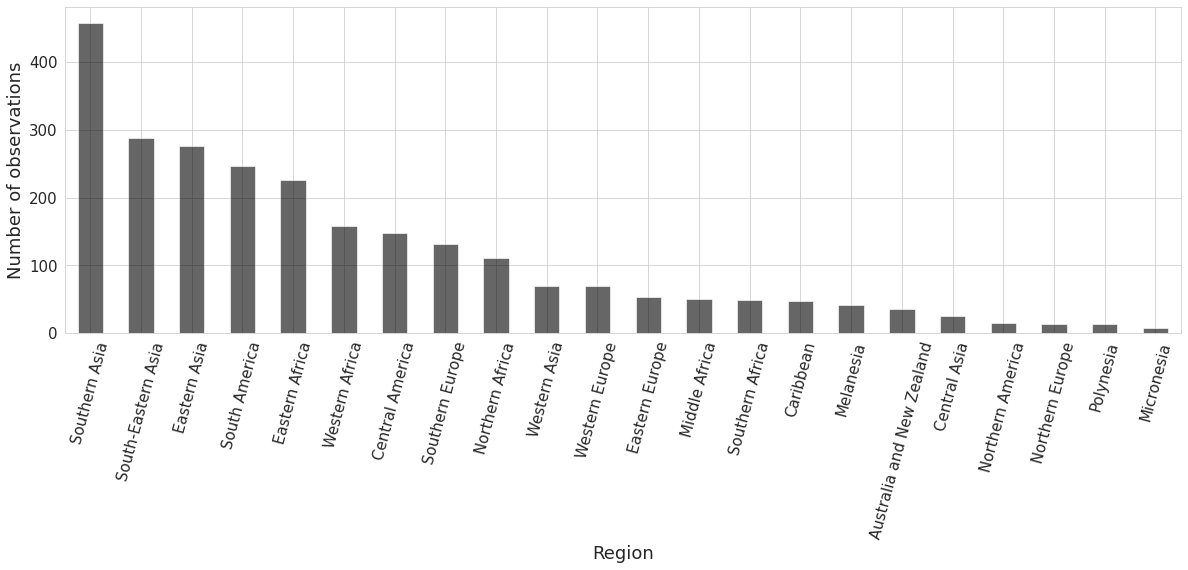

In [54]:
data['Reg'].value_counts().plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel("Region", fontsize = 18)
plt.ylabel("Number of observations", fontsize = 18)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15)

## Analysis on Southern Asia

In [55]:
Southern_Asia = data.loc[data['Reg'] == 'Southern Asia']
Southern_Asia

,Cty,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%,arable_land%,...,pc_f_supply,ISO,Reg,Con,Grp,Subgrp,Dis_type,S_year,E_year,CPI
0,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27.0,41.4,...,33.0,AFG,Southern Asia,Asia,Natural,Hydrological,Landslide,2015,2015,87.469932
1,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27.0,41.4,...,33.0,AFG,Southern Asia,Asia,Natural,Hydrological,Landslide,2015,2015,87.469932
2,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27.0,41.4,...,33.0,AFG,Southern Asia,Asia,Natural,Geophysical,Earthquake,2015,2015,87.469932
3,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27.0,41.4,...,33.0,AFG,Southern Asia,Asia,Natural,Geophysical,Earthquake,2015,2015,87.469932
4,Afghanistan,2015,2068.3,21.5,7.4,45.1,5.1,15.5,27.0,41.4,...,33.0,AFG,Southern Asia,Asia,Natural,Hydrological,Flood,2015,2015,87.469932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,Sri Lanka,2019,13079.5,3.7,0.8,8.9,0.2,1.9,NaN,NaN,...,16.0,LKA,Southern Asia,Asia,Natural,Hydrological,Flood,2019,2019,94.349092
2299,Sri Lanka,2019,13079.5,3.7,0.8,8.9,0.2,1.9,NaN,NaN,...,16.0,LKA,Southern Asia,Asia,Natural,Hydrological,Flood,2019,2019,94.349092
2300,Sri Lanka,2020,12540.0,3.4,0.7,10.0,0.2,2.1,NaN,NaN,...,18.0,LKA,Southern Asia,Asia,Natural,Meteorological,Storm,2020,2020,95.512967
2301,Sri Lanka,2020,12540.0,3.4,0.7,10.0,0.2,2.1,NaN,NaN,...,18.0,LKA,Southern Asia,Asia,Natural,Hydrological,Flood,2020,2020,95.512967


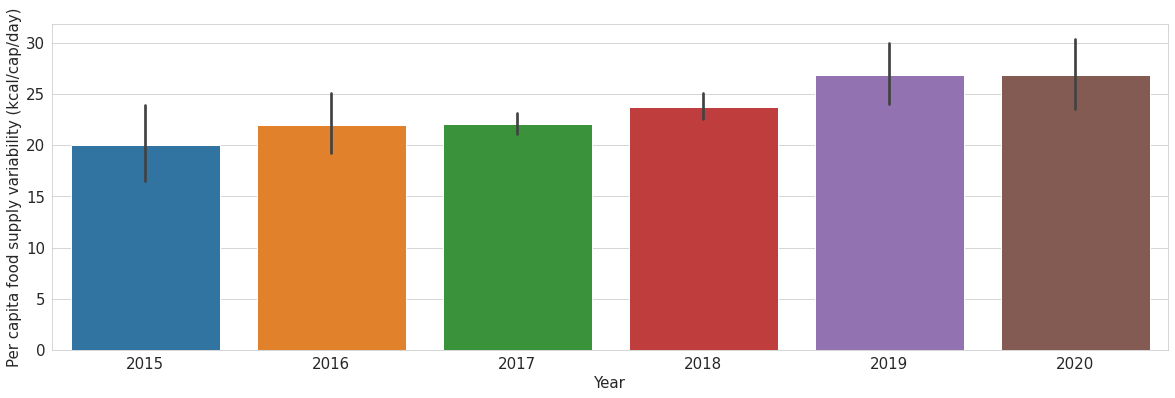

In [56]:
plt.figure(figsize=(20,6))

sns.barplot(data = Southern_Asia[['Year','pc_f_supply']], x = 'Year', y = 'pc_f_supply')

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Per capita food supply variability (kcal/cap/day)',fontsize = 15)

plt.tick_params(labelsize = 15)

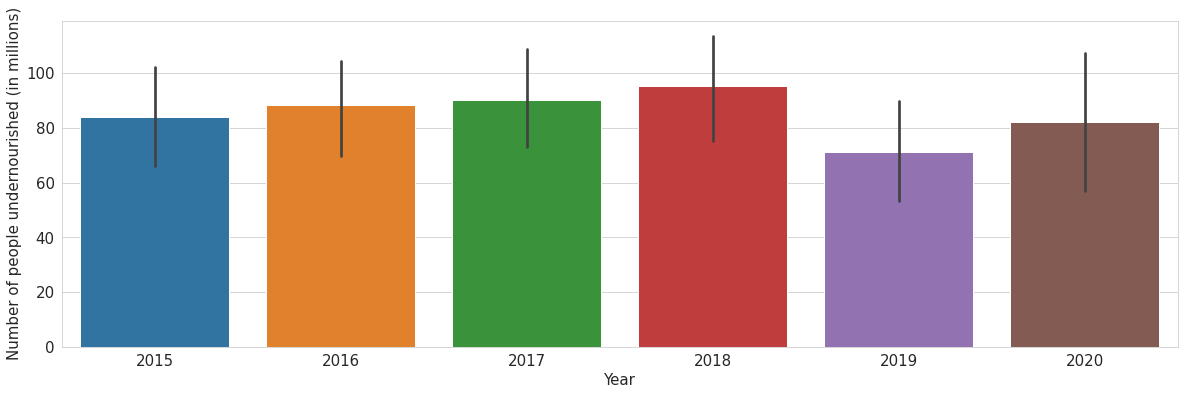

In [57]:
plt.figure(figsize=(20,6))

sns.barplot(data = Southern_Asia[['Year','undernourish(in m)']], x = 'Year', y = 'undernourish(in m)')

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of people undernourished (in millions)',fontsize = 15)

plt.tick_params(labelsize = 15)

### Disasters in Southern Asia

Total disasters in Southern Asia each year.

In [58]:
dis_counts = Southern_Asia[['Year','Grp']].groupby(['Year']).count()
dis_counts

,Grp
Year,
2015,84
2016,80
2017,86
2018,72
2019,82
2020,54


Natural disasters in Southern Asia each year.

In [59]:
dis_counts = Southern_Asia[['Year','Grp']].loc[Southern_Asia['Grp'] == 'Natural'].groupby(['Year']).count()
dis_counts

,Grp
Year,
2015,58
2016,39
2017,47
2018,43
2019,54
2020,40


# Analysis on Country 

In [60]:
print(data['Cty'].value_counts())

China         214
India         185
Indonesia     128
Pakistan       80
Mexico         59
             ... 
Seychelles      1
Luxembourg      1
Latvia          1
Slovenia        1
Cyprus          1
Name: Cty, Length: 147, dtype: int64


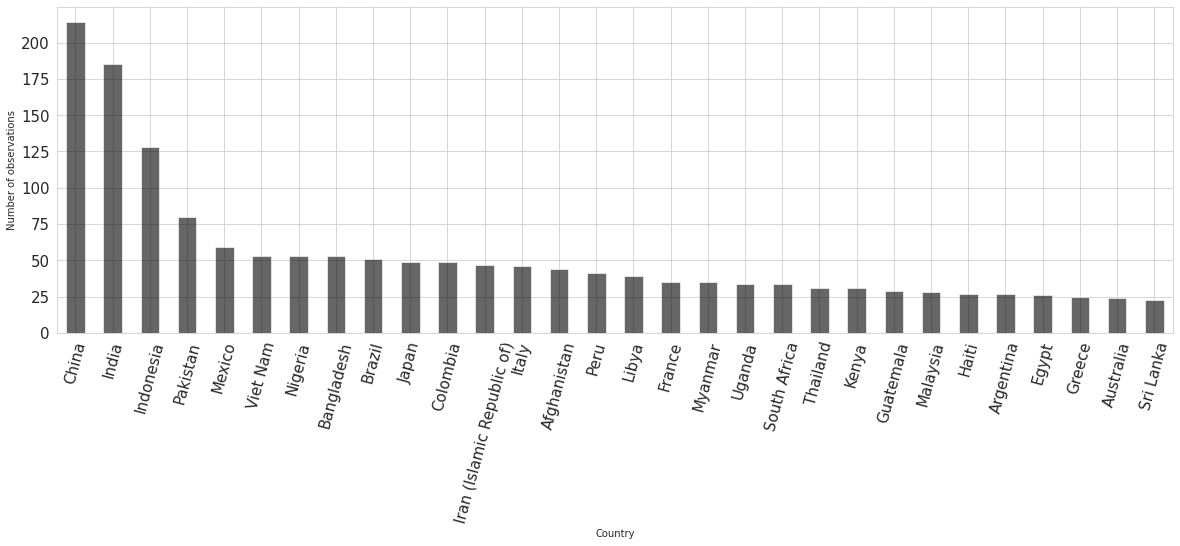

In [61]:
data['Cty'].value_counts().head(30).plot(kind = 'bar', figsize = (20,6), color = 'k', alpha = 0.6)

plt.xlabel("Country", fontsize = 10)
plt.ylabel("Number of observations", fontsize = 10)

plt.xticks(rotation = 75)
plt.tick_params(labelsize = 15)

## Analyzing India's Data

In [62]:
India_data = data.loc[data['Cty'] == 'India']
India_data

,Cty,Year,GDP,undernourish%,undernourish(in m),m/s_fins%,s_fins(in m),m/s_fins(in m),c_dep_ratio%,arable_land%,...,pc_f_supply,ISO,Reg,Con,Grp,Subgrp,Dis_type,S_year,E_year,CPI
979,India,2015,5464.4,14.5,190.5,NaN,NaN,NaN,-7.3,44.8,...,10.0,IND,Southern Asia,Asia,Natural,Meteorological,Storm,2015,2015,87.469932
980,India,2015,5464.4,14.5,190.5,NaN,NaN,NaN,-7.3,44.8,...,10.0,IND,Southern Asia,Asia,Technological,Technological,Miscellaneous accident,2015,2015,87.469932
981,India,2015,5464.4,14.5,190.5,NaN,NaN,NaN,-7.3,44.8,...,10.0,IND,Southern Asia,Asia,Natural,Hydrological,Flood,2015,2015,87.469932
982,India,2015,5464.4,14.5,190.5,NaN,NaN,NaN,-7.3,44.8,...,10.0,IND,Southern Asia,Asia,Natural,Hydrological,Flood,2015,2015,87.469932
983,India,2015,5464.4,14.5,190.5,NaN,NaN,NaN,-7.3,44.8,...,10.0,IND,Southern Asia,Asia,Natural,Hydrological,Flood,2015,2015,87.469932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,India,2020,6186.6,16.3,224.3,NaN,NaN,NaN,NaN,NaN,...,20.0,IND,Southern Asia,Asia,Technological,Technological,Industrial accident,2020,2020,95.512967
1160,India,2020,6186.6,16.3,224.3,NaN,NaN,NaN,NaN,NaN,...,20.0,IND,Southern Asia,Asia,Technological,Technological,Miscellaneous accident,2020,2020,95.512967
1161,India,2020,6186.6,16.3,224.3,NaN,NaN,NaN,NaN,NaN,...,20.0,IND,Southern Asia,Asia,Natural,Hydrological,Flood,2020,2020,95.512967
1162,India,2020,6186.6,16.3,224.3,NaN,NaN,NaN,NaN,NaN,...,20.0,IND,Southern Asia,Asia,Natural,Hydrological,Flood,2020,2020,95.512967


In [63]:
India_data.isna().sum()

Cty                     0
Year                    0
GDP                     0
undernourish%           0
undernourish(in m)      0
m/s_fins%             185
s_fins(in m)          185
m/s_fins(in m)        185
c_dep_ratio%           41
arable_land%           41
pc_f_prod(1000$)       17
pc_f_supply             0
ISO                     0
Reg                     0
Con                     0
Grp                     0
Subgrp                  0
Dis_type                0
S_year                  0
E_year                  0
CPI                     0
dtype: int64

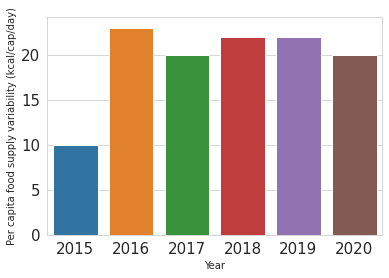

In [64]:
sns.barplot(data = India_data[['Year','pc_f_supply']], x = 'Year', y = 'pc_f_supply')

plt.xlabel('Year', fontsize = 10)
plt.ylabel('Per capita food supply variability (kcal/cap/day)',fontsize = 10)

plt.tick_params(labelsize = 15)

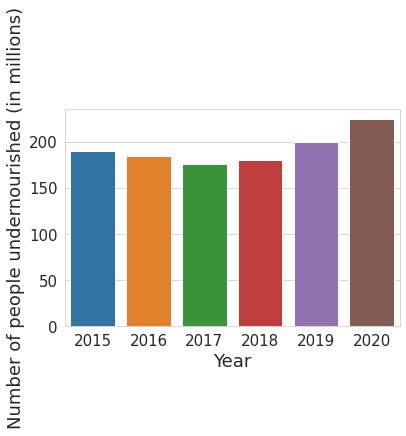

In [65]:
sns.barplot(data = India_data[['Year','undernourish(in m)']], x = 'Year', y = 'undernourish(in m)')

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of people undernourished (in millions)',fontsize = 18)

plt.tick_params(labelsize = 15)

### Diasasters in India 

Total disasters in India each year.

In [66]:
dis_counts = India_data[['Year','Grp']].groupby(['Year']).count()
dis_counts

,Grp
Year,
2015,33
2016,34
2017,41
2018,36
2019,24
2020,17


Natural disasters in India each year.

In [67]:
India_data[['Year','Grp']].loc[India_data['Grp'] == 'Natural'].groupby(['Year']).count()

,Grp
Year,
2015,22
2016,16
2017,18
2018,23
2019,14
2020,11
